# Logistic Regression

Problem: Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/ex2data1.txt', header = None, names = ['score_first_exam','score_second_exam','admission_chance' ])
data.head(3)

,score_first_exam,score_second_exam,admission_chance
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0


Text(0,0.5,'Exam 2 Score')

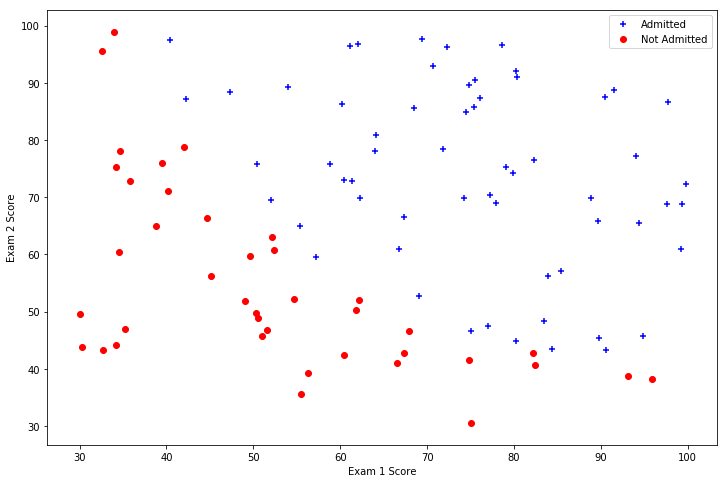

In [3]:
positive = data[data['admission_chance'].isin([1])] # index of rows where column has 1
negative = data[data['admission_chance'].isin([0])] # index of rows where column has 0
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['score_first_exam'],positive['score_second_exam'],c = 'blue', marker = '+', label = 'Admitted')
ax.scatter(negative['score_first_exam'],negative['score_second_exam'],c = 'red',marker = 'o', label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')


# Implementation

In [4]:
# sigmid function
import numpy as np
def sigmoid(z):
    return 1/(1 + (np.exp(-z)))
sigmoid(0)

0.5

In [5]:
#cost function
def cost(theta, X,y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

In [6]:
# Gradient descent
def gradient(theta,X,y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [7]:
data.insert(0,'Ones',1)

In [8]:
X = data.iloc[:,0:3]
y = data.iloc[:,3]  
m = len(X)
theta = np.zeros((3,1), dtype = int)

In [9]:
y = y[:,np.newaxis] # or you can use y = data.iloc[:,3:4] while putting labels in y
# but this will result in dataframe and while using scipy, it will be difficult to flatten y

In [10]:
X.shape, theta.shape, y.shape

((100, 3), (3, 1), (100, 1))

In [11]:
# now the shpae match so lets call cost function with initialized parameters
J = cost(theta, X,y)
J

0    0.693147
dtype: float64

# Learning parameters using fmin_tnc
we found the optimal parameters of a linear regression model by implementing the gradient descent algorithm. We wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking the gradient descent steps, we will use a built-in function fmin_tnc from scipy library.

fmin_tnc is an optimization solver that finds the minimum of an unconstrained function. For logistic regression, you want to optimize the cost function with the parameters theta.

Constraints in optimization often refer to constraints on the parameters. For example, constraints that bound the possible values theta can take (e.g., theta ≤ 1). Logistic regression does not have such constraints since theta is allowed to take any real value.
Concretely, you are going to use fmin_tnc to find the best or optimal parameters theta for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to fmin_tnc the following inputs:

The initial values of the parameters we are trying to optimize.
A function that, when given the training set and a particular theta, computes the logistic regression cost and gradient with respect to theta for the dataset (X, y).


In [12]:
import scipy.optimize as opt

In [13]:
temp = opt.fmin_tnc(func = cost, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (X,y.flatten()))
#the output of above function is a tuple whose first element #contains the optimized values of theta
theta_optimized = temp[0]
print(theta_optimized)

[-25.16131859   0.20623159   0.20147149]


Note on flatten() function: Unfortunately scipy’s fmin_tnc doesn’t work well with column or row vector. It expects the parameters to be in an array format. The flatten() function reduces a column or row vector into array format.


If you have completed the costFunction correctly, fmin_tnc will converge on the right optimization parameters and return the final values of theta. Notice that by using fmin_tnc, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by fmin_tnc. You only needed to provide a function for calculating the cost and the gradient.

Lets use these optimized theta values to calculate the cost.

In [14]:
J = cost(theta_optimized[:,np.newaxis],X,y)
J

0    0.203498
dtype: float64

cost function reduced from 0.693 to 0.2034

# Plotting the decision boundary

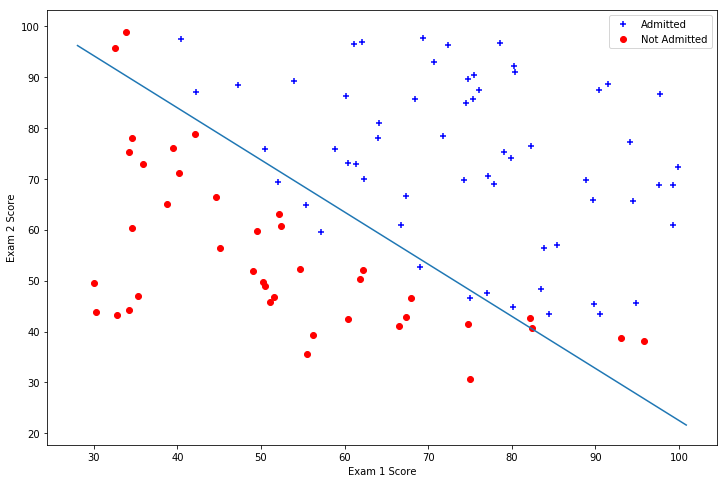

In [15]:
positive = data[data['admission_chance'].isin([1])] # index of rows where column has 1
negative = data[data['admission_chance'].isin([0])] # index of rows where column has 0
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['score_first_exam'],positive['score_second_exam'],c = 'blue', marker = '+', label = 'Admitted')
ax.scatter(negative['score_first_exam'],negative['score_second_exam'],c = 'red',marker = 'o', label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plot_x = [np.min(X.iloc[:,1]-2), np.max(X.iloc[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
          + np.dot(theta_optimized[1],plot_x))  
decision_boun = plt.plot(plot_x, plot_y)

In [16]:
# now lets quantify model to know accuracy
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)
accuracy(X, y.flatten(), theta_optimized, 0.5)

89.0
